**A complete implementation of a brain tumor detection model using a CONVOLUTIONAL NEURAL NETWORK (CNN) in TensorFlow**

**STEP 1: SETTING UP THE DATASET PATHS AND DIRECTORIES and IMPORTING ALL THE NECESARY LIBRARIES:**
Here, the dataset_path variable is set to the root path of the brain tumor MRI dataset. The training and testing directories are defined by joining the dataset path with the specific subdirectories..

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(84).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(44).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(245).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/6.jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(238).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(196).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(108).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(310).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image (5).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(186).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(29).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(140).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(224).jpg

In [2]:
import keras 
from keras.models import Sequential
from keras.layers import Conv2D, Flatten, Dense, MaxPooling2D, Dropout
from sklearn.metrics import accuracy_score
import ipywidgets as widgets
import io
from PIL import Image
import tqdm
from sklearn.model_selection import train_test_split
import cv2
from sklearn.utils import shuffle
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns

**STEP 2: SETTING UP THE DATASET PATHS AND DIRECTORIES:**

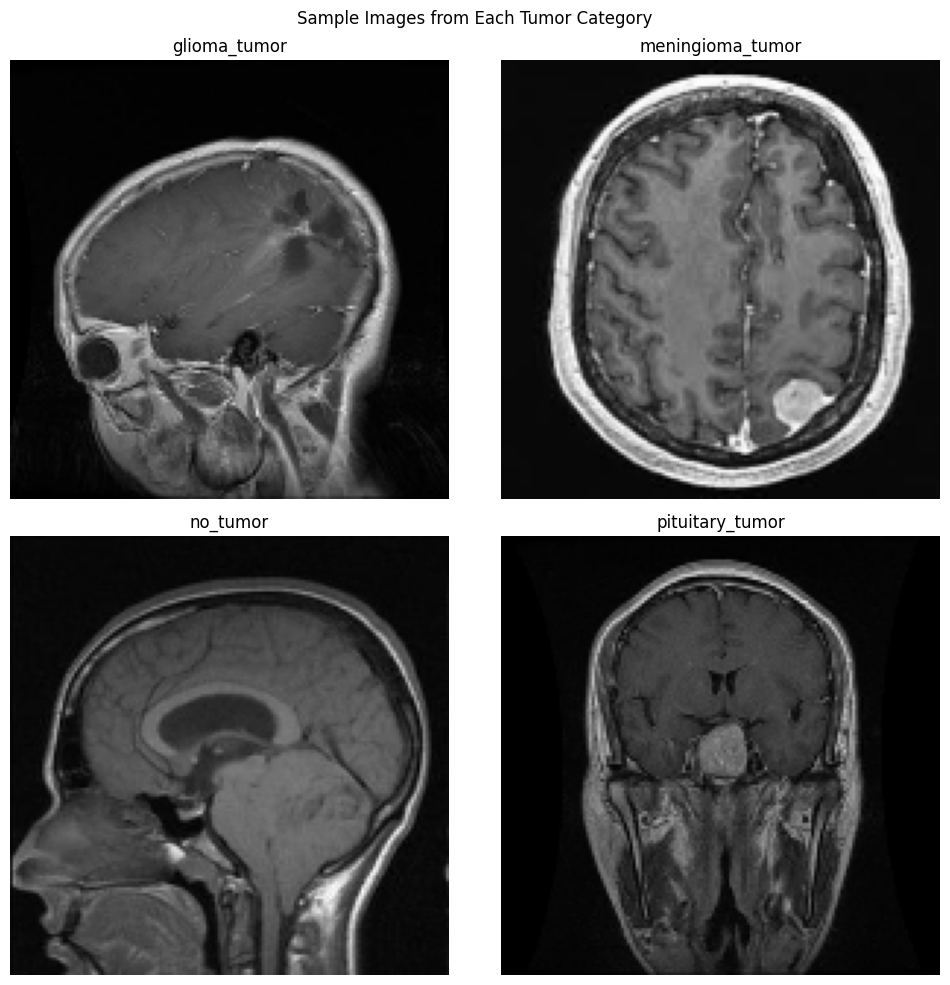

In [3]:
X_train = []
Y_train = []
image_size = 150
labels = ['glioma_tumor','meningioma_tumor','no_tumor','pituitary_tumor']

# Load one sample image from each label/category
sample_images = []
for label in labels:
    folderPath = os.path.join('/kaggle/input/brain-tumor-classification-mri/Training', label)
    image_name = os.listdir(folderPath)[0]  # Get the first image in the folder
    img_path = os.path.join(folderPath, image_name)
    img = cv2.imread(img_path)
    img = cv2.resize(img, (image_size, image_size))
    sample_images.append((img, label))

# Display each sample image in a 2x2 grid
plt.figure(figsize=(10, 10))
for i, (img, label) in enumerate(sample_images):
    plt.subplot(2, 2, i + 1)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title(label)
    plt.axis("off")

plt.suptitle("Sample Images from Each Tumor Category")
plt.tight_layout()
plt.show()


In [4]:

for i in labels:
    folderPath = os.path.join('/kaggle/input/brain-tumor-classification-mri/Training', i)
    for j in os.listdir(folderPath):
        img = cv2.imread(os.path.join(folderPath, j))
        img = cv2.resize(img,(image_size, image_size))
        X_train.append(img)
        Y_train.append(i)

for i in labels:
    folderPath = os.path.join('/kaggle/input/brain-tumor-classification-mri/Testing', i)
    for j in os.listdir(folderPath):
        img = cv2.imread(os.path.join(folderPath, j))
        img = cv2.resize(img,(image_size, image_size))
        X_train.append(img)
        Y_train.append(i)
        
        

X_train = np.array(X_train)
Y_train = np.array(Y_train)


Shuffling the Dataset with rando, state 101

In [5]:
X_train, Y_train = shuffle(X_train, Y_train, random_state=101)
X_train.shape

(3264, 150, 150, 3)

**Split the Data into train and test**

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X_train, Y_train, test_size=0.1, random_state=101)

**Converting Labels to Indices:**
'glioma_tumor' → 0
'meningioma_tumor' → 1
'no_tumor' → 2
'pituitary_tumor' → 3

In [7]:
y_train_new = []
for i in y_train:
    y_train_new.append(labels.index(i))
y_train = y_train_new
y_train = tf.keras.utils.to_categorical(y_train)

y_test_new = []
for i in y_test:
   
    y_test_new.append(labels.index(i))
y_test = y_test_new
y_test = tf.keras.utils.to_categorical(y_test)

**BUILDING THE MODEL ARTITECHURE**
The model architecture is defined using a sequential model (Sequential class). It consists of a series of convolutional (Conv2D) and max pooling (MaxPooling2D) layers, followed by a flattening layer, two fully connected (Dense) layers, and a dropout layer for regularization.
The activation function used for the convolutional layers is ReLU, except for the last dense layer, where softmax activation is used to output class probabilities.
The model is compiled with the Adam optimizer, which is an adaptive learning rate optimization algorithm. The loss function used is categorical cross-entropy, suitable for multi-class classification problems with one-hot encoded labels.
The accuracy metric is also specified to monitor the model's performance during training.

In [8]:
model = Sequential()
model.add(Conv2D(32,(3,3),activation='relu', input_shape=(150,150,3)))
model.add(Conv2D(64,(3,3), activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Conv2D(64,(3,3), activation='relu'))
model.add(Conv2D(64,(3,3), activation='relu'))
model.add(Dropout(0.3))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Conv2D(128,(3,3), activation='relu'))
model.add(Conv2D(128,(3,3), activation='relu'))
model.add(Conv2D(128,(3,3), activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Conv2D(128,(3,3), activation='relu'))
model.add(Conv2D(256,(3,3), activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(4, activation='softmax'))


/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


**Detailed overview of the model's architecture,**

In [9]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 146, 146, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 73, 73, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 73, 73, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 71, 71, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 69, 69, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 69, 69, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 34, 34, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 34, 34, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 32, 32, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 30, 30, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 28, 28, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 12, 12, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 10, 10, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 5, 5, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 5, 5, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 6400)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     3,277,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 4)              │         2,052 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,447,044 (16.96 MB)

 Trainable params: 4,447,044 (16.96 MB)

 Non-trainable params: 0 (0.00 B)

In [10]:
model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

**Train the Model**

In [11]:
history = model.fit(X_train, y_train, epochs=20, validation_split=0.1)


Epoch 1/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 257s 3s/step - accuracy: 0.2993 - loss: 4.3299 - val_accuracy: 0.4762 - val_loss: 1.2954
Epoch 2/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 265s 3s/step - accuracy: 0.4901 - loss: 1.1515 - val_accuracy: 0.5986 - val_loss: 0.8869
Epoch 3/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 253s 3s/step - accuracy: 0.6170 - loss: 0.8977 - val_accuracy: 0.6633 - val_loss: 0.7745
Epoch 4/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 261s 3s/step - accuracy: 0.6785 - loss: 0.7754 - val_accuracy: 0.7007 - val_loss: 0.7318
Epoch 5/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 261s 3s/step - accuracy: 0.7192 - loss: 0.6687 - val_accuracy: 0.7619 - val_loss: 0.6435
Epoch 6/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 259s 3s/step - accuracy: 0.7410 - loss: 0.5852 - val_accuracy: 0.7381 - val_loss: 0.6048
Epoch 7/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 262s 3s/step - accuracy: 0.7869 - loss: 0.5155 - val_accuracy: 0.8027 - val_loss: 0.4877
Epoch 8/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 255s 3s/step - accuracy: 0.8194 - loss: 0.4583 - val_accuracy: 0.8061 - v

**VISUALIZATION THROUGH GRAPH**

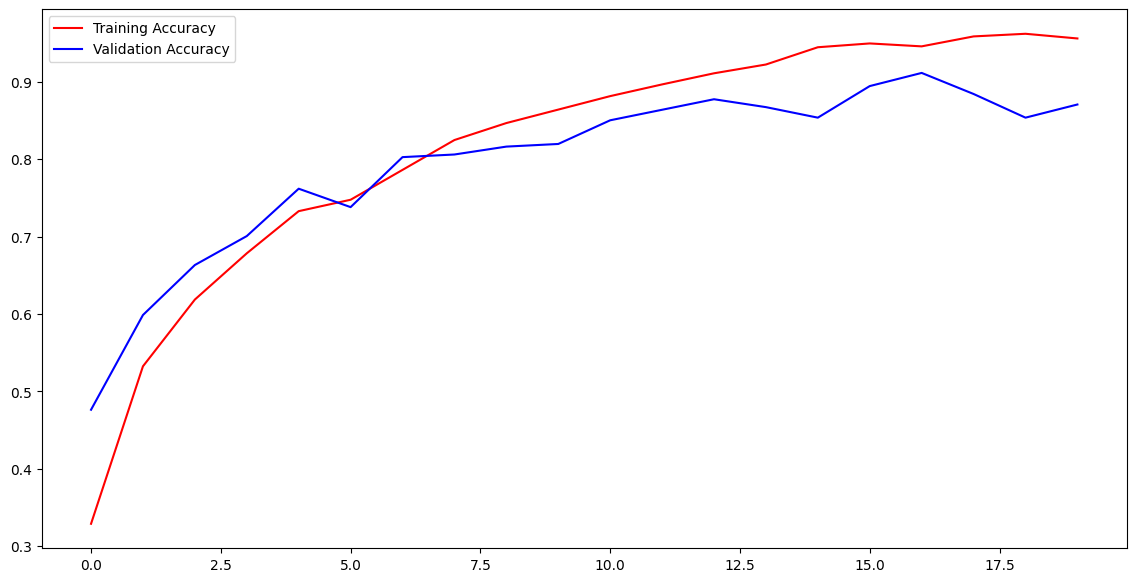

In [12]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(len(acc))
fig = plt.figure(figsize=(14,7))
plt.plot(epochs,acc,'r',label='Training Accuracy')
plt.plot(epochs,val_acc,'b',label='Validation Accuracy')
plt.legend(loc='upper left')
plt.show()

This code plots the training and validation accuracy over epochs using the data stored in history. It helps visualize the model's learning progress and check for overfitting or underfitting.

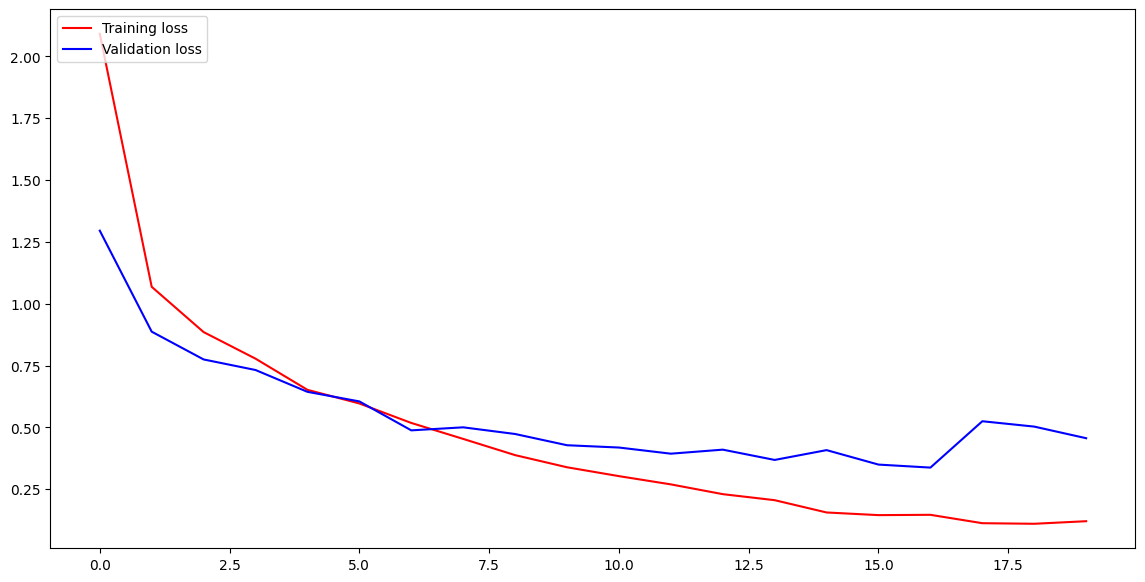

In [13]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(loss))
fig = plt.figure(figsize=(14,7))
plt.plot(epochs,loss,'r',label='Training loss')
plt.plot(epochs,val_loss,'b',label='Validation loss')
plt.legend(loc='upper left')
plt.show()

This code plots the training and validation loss over epochs using the data stored in history. It helps visualize how the model's loss decreases over time, indicating improved performance.

**Test the model**

In [14]:
img = cv2.imread('/kaggle/input/brain-tumor-classification-mri/Training/pituitary_tumor/p (107).jpg')
img = cv2.resize(img,(150,150))
img_array = np.array(img)
img_array.shape

(150, 150, 3)

In [15]:
img_array = img_array.reshape(1,150,150,3)
img_array.shape

(1, 150, 150, 3)

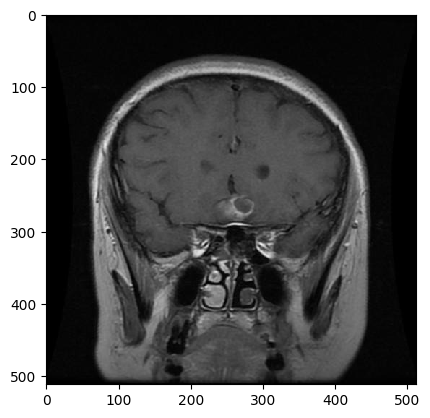

In [22]:
from tensorflow.keras.preprocessing import image
img = image.load_img('/kaggle/input/brain-tumor-classification-mri/Training/pituitary_tumor/p (107).jpg')
plt.imshow(img, interpolation='nearest')
plt.show()

In [23]:
a=model.predict(img_array)
indices = a.argmax()
indices

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


3

**EVALUATION**

In [24]:
# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=1)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=1)

# Print the test accuracy
print(f"Tests Accuracy: {test_accuracy * 100:.2f}%")

11/11 ━━━━━━━━━━━━━━━━━━━━ 9s 775ms/step - accuracy: 0.8272 - loss: 0.8385
Test Loss: 0.6785828471183777
Test Accuracy: 0.8379204869270325
11/11 ━━━━━━━━━━━━━━━━━━━━ 8s 758ms/step - accuracy: 0.8272 - loss: 0.8385
Tests Accuracy: 83.79%


**CONFUSION MATRIX AND EXPLANATION:**

11/11 ━━━━━━━━━━━━━━━━━━━━ 9s 778ms/step


<Figure size 1000x800 with 0 Axes>

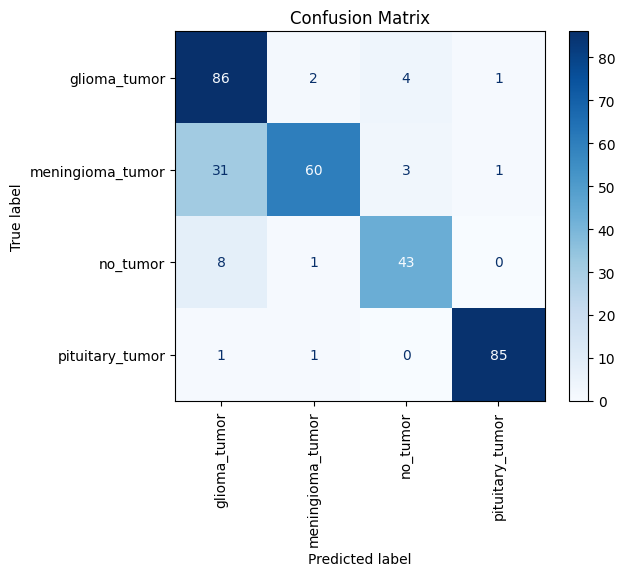

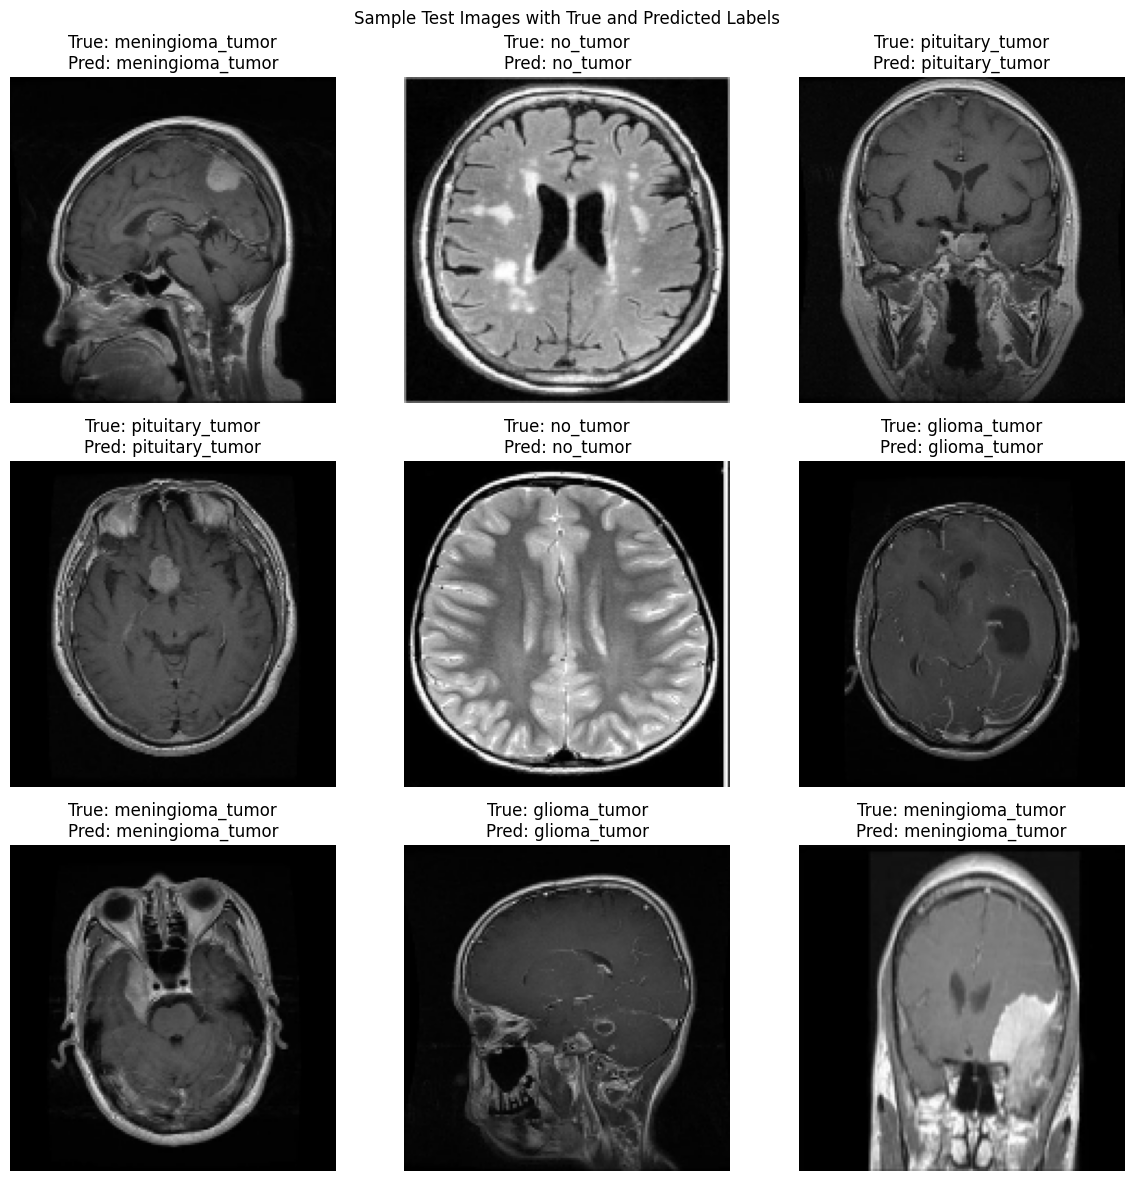

In [26]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Predict on the test set and get the predicted class indices
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

# Create the confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred_classes)
conf_matrix_display = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=labels)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
conf_matrix_display.plot(cmap="Blues", xticks_rotation="vertical")
plt.title("Confusion Matrix")
plt.show()

# Plot sample images with their predicted and true labels
plt.figure(figsize=(12, 12))
for i in range(9):  # Displaying 9 sample images
    idx = np.random.randint(0, len(X_test))
    img = X_test[idx]
    true_label = labels[y_true[idx]]
    predicted_label = labels[y_pred_classes[idx]]
    
    plt.subplot(3, 3, i + 1)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title(f"True: {true_label}\nPred: {predicted_label}")
    plt.axis("off")

plt.suptitle("Sample Test Images with True and Predicted Labels")
plt.tight_layout()
plt.show()


In [27]:
from sklearn.metrics import f1_score, classification_report, confusion_matrix

# Predict classes for the test set
y_pred = model.predict(X_test)  # Predict probabilities
y_pred_classes = np.argmax(y_pred, axis=1)  # Convert probabilities to class labels
y_true = np.argmax(y_test, axis=1)  # Convert one-hot encoded labels to class indices

# Compute F1 Score
f1 = f1_score(y_true, y_pred_classes, average='weighted')
print(f"Weighted F1 Score: {f1:.4f}")

# Display classification report
print("\nClassification Report:")
print(classification_report(y_true, y_pred_classes, target_names=labels))

# Optionally, print confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_true, y_pred_classes))

11/11 ━━━━━━━━━━━━━━━━━━━━ 9s 781ms/step
Weighted F1 Score: 0.8366

Classification Report:
                  precision    recall  f1-score   support

    glioma_tumor       0.68      0.92      0.79        93
meningioma_tumor       0.94      0.63      0.75        95
        no_tumor       0.86      0.83      0.84        52
 pituitary_tumor       0.98      0.98      0.98        87

        accuracy                           0.84       327
       macro avg       0.86      0.84      0.84       327
    weighted avg       0.86      0.84      0.84       327


Confusion Matrix:
[[86  2  4  1]
 [31 60  3  1]
 [ 8  1 43  0]
 [ 1  1  0 85]]


11/11 ━━━━━━━━━━━━━━━━━━━━ 8s 742ms/step - accuracy: 0.8272 - loss: 0.8385
Test Accuracy: 83.79%
